In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# make a plot outputs appear and be stored within the notebook
%matplotlib inline

print("Import Complete!")


Import Complete!


In [2]:
df_test = pd.read_csv('./kddcup.data_10_percent_corrected', header=None)
df_test.columns = ["duration",
"protocol_type",
"service",
"flag",
"src_bytes",
"dst_bytes",
"land",
"wrong_fragment",
"urgent",
"hot",
"num_failed_logins",
"logged_in",
"num_compromised",
"root_shell",
"su_attempted",
"num_root",
"num_file_creations",
"num_shells",
"num_access_files",
"num_outbound_cmds",
"is_host_login",
"is_guest_login",
"count",
"srv_count",
"serror_rate",
"srv_serror_rate",
"rerror_rate",
"srv_rerror_rate",
"same_srv_rate",
"diff_srv_rate",
"srv_diff_host_rate",
"dst_host_count",
"dst_host_srv_count",
"dst_host_same_srv_rate",
"dst_host_diff_srv_rate",
"dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate",
"dst_host_serror_rate",
"dst_host_srv_serror_rate",
"dst_host_rerror_rate",
"dst_host_srv_rerror_rate",
"target"]

<h2>Get a look on the datasets</h2>

In [3]:
df_test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

<h2>Get unique values from symbolic columns</h2>

In [5]:
print(f"protocol_type: {df_test['protocol_type'].unique()}\n\n service: {df_test['service'].unique()}\n\n flag: {df_test['flag'].unique()}\n\n target: {df_test['target'].unique()}")

protocol_type: ['tcp' 'udp' 'icmp']

 service: ['http' 'smtp' 'finger' 'domain_u' 'auth' 'telnet' 'ftp' 'eco_i' 'ntp_u'
 'ecr_i' 'other' 'private' 'pop_3' 'ftp_data' 'rje' 'time' 'mtp' 'link'
 'remote_job' 'gopher' 'ssh' 'name' 'whois' 'domain' 'login' 'imap4'
 'daytime' 'ctf' 'nntp' 'shell' 'IRC' 'nnsp' 'http_443' 'exec' 'printer'
 'efs' 'courier' 'uucp' 'klogin' 'kshell' 'echo' 'discard' 'systat'
 'supdup' 'iso_tsap' 'hostnames' 'csnet_ns' 'pop_2' 'sunrpc' 'uucp_path'
 'netbios_ns' 'netbios_ssn' 'netbios_dgm' 'sql_net' 'vmnet' 'bgp' 'Z39_50'
 'ldap' 'netstat' 'urh_i' 'X11' 'urp_i' 'pm_dump' 'tftp_u' 'tim_i' 'red_i']

 flag: ['SF' 'S1' 'REJ' 'S2' 'S0' 'S3' 'RSTO' 'RSTR' 'RSTOS0' 'OTH' 'SH']

 target: ['normal.' 'buffer_overflow.' 'loadmodule.' 'perl.' 'neptune.' 'smurf.'
 'guess_passwd.' 'pod.' 'teardrop.' 'portsweep.' 'ipsweep.' 'land.'
 'ftp_write.' 'back.' 'imap.' 'satan.' 'phf.' 'nmap.' 'multihop.'
 'warezmaster.' 'warezclient.' 'spy.' 'rootkit.']


In [6]:
df_test['target'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

<h2>Count missing values</h2>

In [7]:
df_test.isna().sum().sort_values(ascending=False) # count missing values

duration                       0
dst_host_count                 0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_srv_count             0
protocol_type                  0
dst_host_same_srv_rate         0
dst_host_diff_srv_rate         0
dst_host_same_src_port_rate    0
dst_host_srv_diff_host_rate    0
dst_host_serror_rate           0
dst_host_srv_serror_rate       0
dst_host_rerror_rate           0
dst_host_srv_rerror_rate       0
count                          0
is_guest_login                 0
is_host_login                  0
num_outbound_cmds              0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent    

In [8]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

In [9]:
#Adding Attack Type column
df_test['attack_type'] = df_test.target.apply(lambda r:attacks_types[r[:-1]])

df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,attack_type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [10]:
#Finding categorical features
num_cols = df_test._get_numeric_data().columns
cate_cols = list(set(df_test.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('attack_type')

cate_cols

['flag', 'service', 'protocol_type']

In [11]:
def plot_bar_graph(feature):
    df_test[feature].value_counts().plot(kind="bar")

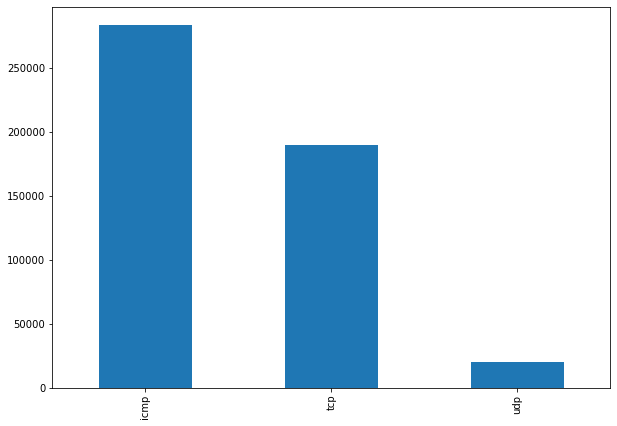

In [12]:
plt.figure(figsize=(10,7))
plot_bar_graph('protocol_type')

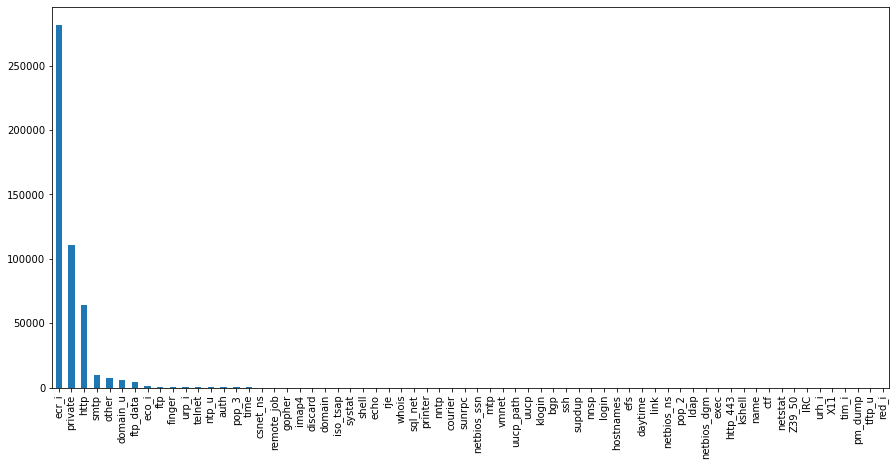

In [13]:
plt.figure(figsize=(15,7))
plot_bar_graph('service')

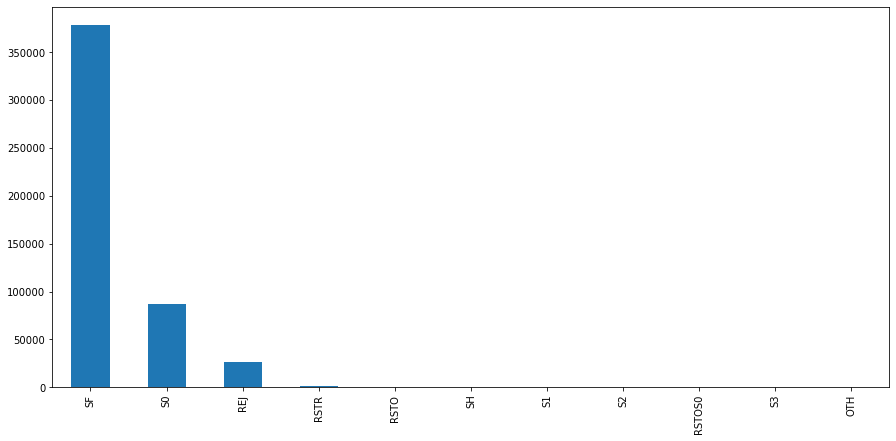

In [14]:
plt.figure(figsize=(15,7))
plot_bar_graph('flag')

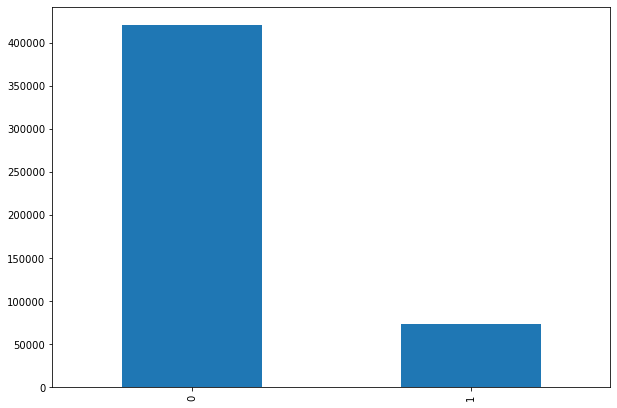

In [15]:
plt.figure(figsize=(10,7))
plot_bar_graph('logged_in')

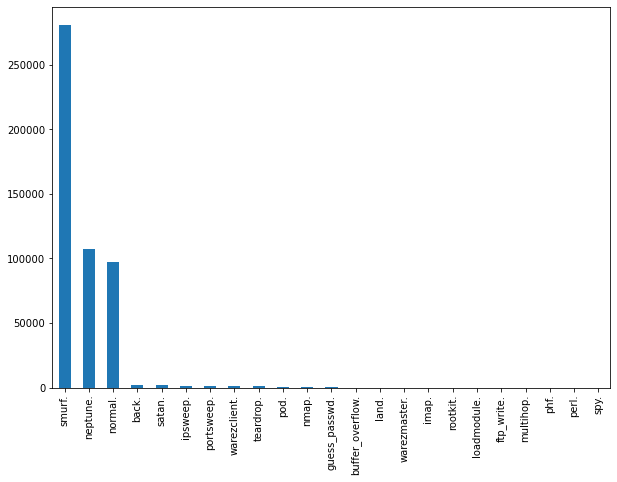

In [16]:
# target distributions
plt.figure(figsize=(10,7))
plot_bar_graph('target')

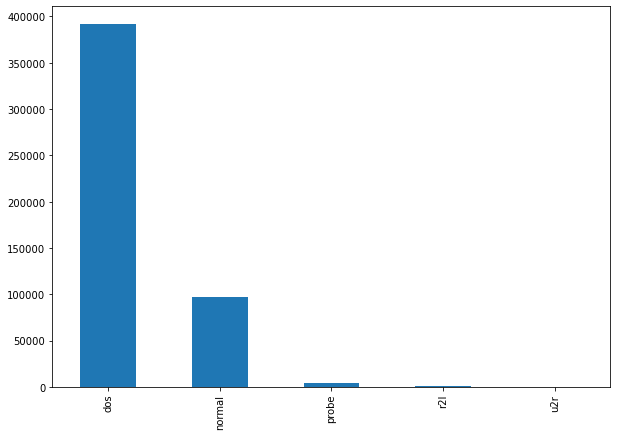

In [17]:
plt.figure(figsize=(10,7))
plot_bar_graph('attack_type')

<h3>Correlation Coefficient</h3>

Correlation is a measure of the linear relationship of 2 or more variables. Through correlation, we can predict one variable from the other. The logic behind using correlation for feature selection is that the good variables are highly correlated with the target. Furthermore, variables should be correlated with the target but should be uncorrelated among themselves.

If two variables are correlated, we can predict one from the other. Therefore, if two features are correlated, the model only really needs one of them, as the second one does not add additional information.

C:\Users\Vlad\AppData\Local\Temp/ipykernel_16508/3215693884.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df_test = df_test.dropna('columns')# drop columns with NaN


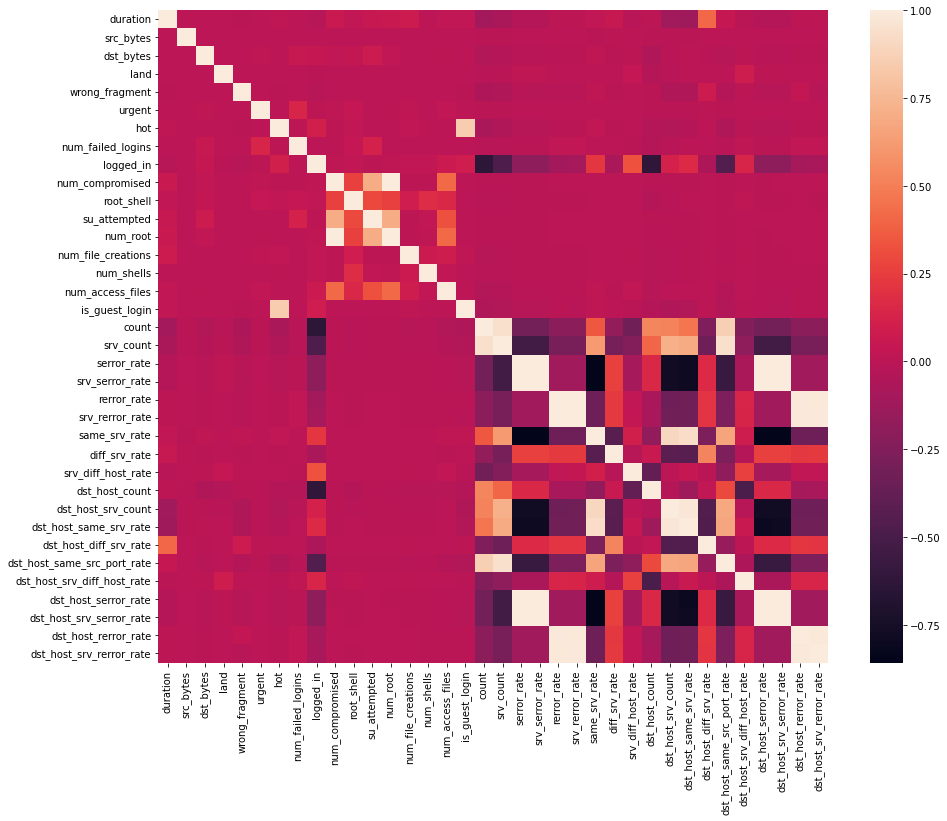

In [18]:
# correlation

df_test = df_test.dropna('columns')# drop columns with NaN
df_test = df_test[[col for col in df_test if df_test[col].nunique() > 1]]# keep columns where there are more than 1 unique values
corr = df_test.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()



In [19]:
print(f"""Correlations:
num_root to num_compromised: {df_test['num_root'].corr(df_test['num_compromised'])}
srv_serror_rate to serror_rate: {df_test['srv_serror_rate'].corr(df_test['serror_rate'])}
srv_count to count: {df_test['srv_count'].corr(df_test['count'])}
srv_rerror_rate to rerror_rate: {df_test['srv_rerror_rate'].corr(df_test['rerror_rate'])}
dst_host_same_srv_rate to dst_host_srv_count: {df_test['dst_host_same_srv_rate'].corr(df_test['dst_host_srv_count'])}
dst_host_srv_serror_rate to dst_host_serror_rate: {df_test['dst_host_srv_serror_rate'].corr(df_test['dst_host_serror_rate'])}
dst_host_srv_rerror_rate to dst_host_rerror_rate: {df_test['dst_host_srv_rerror_rate'].corr(df_test['dst_host_rerror_rate'])}
dst_host_same_srv_rate to same_srv_rate: {df_test['dst_host_same_srv_rate'].corr(df_test['same_srv_rate'])}
dst_host_srv_count to same_srv_rate: {df_test['dst_host_srv_count'].corr(df_test['same_srv_rate'])}
dst_host_same_src_port_rate to srv_count: {df_test['dst_host_same_src_port_rate'].corr(df_test['srv_count'])}
dst_host_serror_rate to serror_rate: {df_test['dst_host_serror_rate'].corr(df_test['serror_rate'])}
dst_host_serror_rate to srv_serror_rate: {df_test['dst_host_serror_rate'].corr(df_test['srv_serror_rate'])}
dst_host_srv_serror_rate to serror_rate: {df_test['dst_host_srv_serror_rate'].corr(df_test['serror_rate'])}
dst_host_srv_serror_rate to srv_serror_rate: {df_test['dst_host_srv_serror_rate'].corr(df_test['srv_serror_rate'])}
dst_host_rerror_rate to rerror_rate: {df_test['dst_host_rerror_rate'].corr(df_test['rerror_rate'])}
dst_host_rerror_rate to srv_rerror_rate: {df_test['dst_host_rerror_rate'].corr(df_test['srv_rerror_rate'])}
dst_host_srv_rerror_rate to rerror_rate: {df_test['dst_host_srv_rerror_rate'].corr(df_test['rerror_rate'])}
dst_host_srv_rerror_rate to srv_rerror_rate: {df_test['dst_host_srv_rerror_rate'].corr(df_test['srv_rerror_rate'])}
""")

Correlations:
num_root to num_compromised: 0.9938277978738366
srv_serror_rate to serror_rate: 0.9983615072725952
srv_count to count: 0.9436670688882655
srv_rerror_rate to rerror_rate: 0.9947309539817937
dst_host_same_srv_rate to dst_host_srv_count: 0.9736854572953983
dst_host_srv_serror_rate to dst_host_serror_rate: 0.9981559173373309
dst_host_srv_rerror_rate to dst_host_rerror_rate: 0.9848038371110298
dst_host_same_srv_rate to same_srv_rate: 0.9278080342691242
dst_host_srv_count to same_srv_rate: 0.8989546630324209
dst_host_same_src_port_rate to srv_count: 0.9449263676783333
dst_host_serror_rate to serror_rate: 0.9986729680105015
dst_host_serror_rate to srv_serror_rate: 0.997835300373975
dst_host_srv_serror_rate to serror_rate: 0.9978492485680104
dst_host_srv_serror_rate to srv_serror_rate: 0.9993041091850098
dst_host_rerror_rate to rerror_rate: 0.9869947924956001
dst_host_rerror_rate to srv_rerror_rate: 0.9821663427308375
dst_host_srv_rerror_rate to rerror_rate: 0.9851995540751249
ds

In [20]:
#highly correlated with num_compromised, should be ignored in analysis
df_test.drop('num_root',axis = 1,inplace = True)

#highly correlated with serror_rate, should be ignored in analysis
df_test.drop('srv_serror_rate',axis = 1,inplace = True)

#highly correlated with rerror_rate, should be ignored in analysis
df_test.drop('srv_rerror_rate',axis = 1, inplace=True)

#highly correlated with srv_serror_rate, should be ignored in analysis
df_test.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#highly correlated with rerror_rate, should be ignored in analysis
df_test.drop('dst_host_serror_rate',axis = 1, inplace=True)

#highly correlated with srv_rerror_rate, should be ignored in analysis
df_test.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#highly correlated with rerror_rate, should be ignored in analysis
df_test.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#highly correlated with dst_host_srv_count, should be ignored in analysis
df_test.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

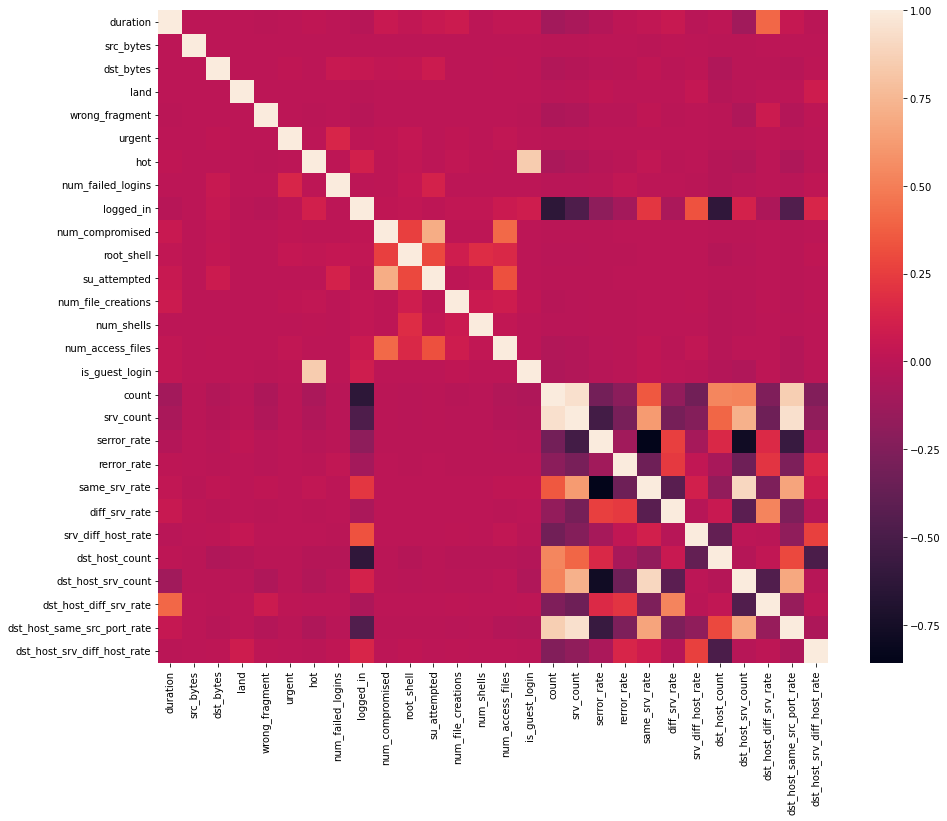

In [21]:
df_test = df_test[[col for col in df_test if df_test[col].nunique() > 1]]# keep columns where there are more than 1 unique values
df_test.drop('service',axis = 1,inplace= True)
corr = df_test.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr)
plt.show()



In [22]:
numeric_cols = df_test._get_numeric_data().columns # gets all the numeric column names
categorical_cols = list(set(df_test.columns)-set(numeric_cols))
categorical_cols.remove('target')
categorical_cols.remove('attack_type')

In [23]:
numeric_cols

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_guest_login', 'count', 'srv_count',
       'serror_rate', 'rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate'],
      dtype='object')

In [24]:
categorical_cols

['protocol_type', 'flag']

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, QuantileTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
def get_classifier(numeric_cols, categorical_cols):
    numeric_pipeline = Pipeline(steps=[
        ('quant',QuantileTransformer()),
        ('scaler',StandardScaler())
    ])
    categorical_pipeline = Pipeline(steps=[
        ('ohc', OneHotEncoder(sparse=False, handle_unknown='ignore'))
    ])
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', categorical_pipeline, categorical_cols),
            ('num', numeric_pipeline, numeric_cols)
        ],
        remainder='passthrough'
    )
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('clf', LogisticRegression(class_weight='balanced', max_iter=1000))        
    ])
    return pipeline


In [26]:
# N_REPEATS_CV = 1
# N_FOLDS = 5

PARAM_GRID = [
    {
    'clf': [LogisticRegression()],
    # 'clf__penalty': ['l1','l2'],
    # 'clf__C': np.logspace(-2,2,3),
    'clf__solver': ['liblinear']
    }
    #   {} # to add another classifier
]

In [27]:
from sklearn.model_selection import ParameterGrid, RepeatedStratifiedKFold, cross_val_predict, GridSearchCV


# rskf = RepeatedStratifiedKFold(n_splits=N_FOLDS, n_repeats=N_REPEATS_CV)

X = df_test.drop(['target','attack_type'], axis=1)
y = df_test['attack_type']


# predictions = []
# for params in ParameterGrid(PARAM_GRID):
#     clf = get_classifier(numeric_cols, categorical_cols)
#     clf.set_params(**params)
#     try:
#         probas_all_classes = cross_val_predict(clf, X, y, cv=rskf, method='predict', n_jobs=-1)
#         print('NEXT')
#     except Exception as e:
#         print('The parameters below produced a failed run')
#         print(params)
#         print(e)
#         continue
#     predictions.append(probas_all_classes)
    

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, QuantileTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
def get_classifier(numeric_cols, categorical_cols):
    numeric_pipeline = Pipeline(steps=[
        ('quant',QuantileTransformer()),
        ('scaler',StandardScaler())
    ])
    categorical_pipeline = Pipeline(steps=[
        ('ohc', OneHotEncoder(sparse=False, handle_unknown='ignore'))
    ])
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', categorical_pipeline, categorical_cols),
            ('num', numeric_pipeline, numeric_cols)
        ],
        remainder='passthrough'
    )
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('clf', LogisticRegression(class_weight='balanced', max_iter=1000))        
    ])
    return pipeline


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, QuantileTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
# numeric_cols, categorical_cols

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=30, stratify=y)

qt = QuantileTransformer()
X_train2 = qt.fit_transform(X_train._get_numeric_data())
sc = StandardScaler()
X_train2 = sc.fit_transform(X_train2)

ohc = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train3 = X_train[['protocol_type', 'flag']]
X_train3 = ohc.fit_transform(X_train3)
X_train2 = pd.DataFrame(X_train2)
X_train3 = pd.DataFrame(X_train3)
df_train_witout_pipeline = pd.concat([X_train2,X_train3],axis=1)

qt2 = QuantileTransformer()
X_test2 = qt2.fit_transform(X_test._get_numeric_data())
sc2 = StandardScaler()
X_test2 = sc2.fit_transform(X_test2)

ohc2 = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_test3 = X_test[['protocol_type', 'flag']]
X_test3 = ohc.fit_transform(X_test3)
X_test2 = pd.DataFrame(X_test2)
X_test3 = pd.DataFrame(X_test3)

df_test_without_pipeline = pd.concat([X_test2,X_test3],axis=1)


clf = LogisticRegression(solver='liblinear',class_weight='balanced', max_iter=1000)

clf.fit(df_train_witout_pipeline, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')

In [60]:
df_test_without_pipeline

,0,1,2,3,4,5,6,7,8,9,...,4,5,6,7,8,9,10,11,12,13
0,-0.159587,-1.516139,-0.458004,-0.007114,-0.050466,-0.003181,-0.082004,-0.015259,-0.417768,-0.067792,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-0.159587,0.877122,-0.458004,-0.007114,-0.050466,-0.003181,-0.082004,-0.015259,-0.417768,-0.067792,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.159587,0.877122,-0.458004,-0.007114,-0.050466,-0.003181,-0.082004,-0.015259,-0.417768,-0.067792,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.159587,0.877122,-0.458004,-0.007114,-0.050466,-0.003181,-0.082004,-0.015259,-0.417768,-0.067792,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.159587,-1.516139,-0.458004,-0.007114,-0.050466,-0.003181,-0.082004,-0.015259,-0.417768,-0.067792,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98800,-0.159587,0.877122,-0.458004,-0.007114,-0.050466,-0.003181,-0.082004,-0.015259,-0.417768,-0.067792,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
98801,-0.159587,-0.537005,2.207789,-0.007114,-0.050466,-0.003181,-0.082004,-0.015259,2.393673,-0.067792,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
98802,-0.159587,0.877122,-0.458004,-0.007114,-0.050466,-0.003181,-0.082004,-0.015259,-0.417768,-0.067792,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
98803,-0.159587,0.877122,-0.458004,-0.007114,-0.050466,-0.003181,-0.082004,-0.015259,-0.417768,-0.067792,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [63]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(n_estimators=50,
                             max_depth=10,
                             random_state=2)



clf2.fit(df_train_witout_pipeline, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=2)

(0.9964600568173004, 0.9956176306867062, 0.9959003660978812, None)
              precision    recall  f1-score   support

         dos      1.000     1.000     1.000     78292
      normal      0.997     0.983     0.990     19456
       probe      0.780     0.954     0.858       822
         r2l      0.631     0.898     0.741       225
         u2r      0.190     0.400     0.258        10

    accuracy                          0.996     98805
   macro avg      0.720     0.847     0.769     98805
weighted avg      0.996     0.996     0.996     98805

cohen kappa score: 0.9868771418049032


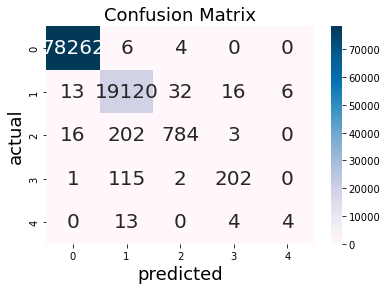

In [62]:
y_pred = clf.predict(df_test_without_pipeline)
evaluation(y_pred, y_test) # with cross validation

(0.9988401239498693, 0.9988462122362228, 0.9987154116758388, None)
              precision    recall  f1-score   support

         dos      1.000     1.000     1.000     78292
      normal      0.994     1.000     0.997     19456
       probe      1.000     0.984     0.992       822
         r2l      0.986     0.613     0.756       225
         u2r      1.000     0.200     0.333        10

    accuracy                          0.999     98805
   macro avg      0.996     0.759     0.816     98805
weighted avg      0.999     0.999     0.999     98805

cohen kappa score: 0.996535944538107


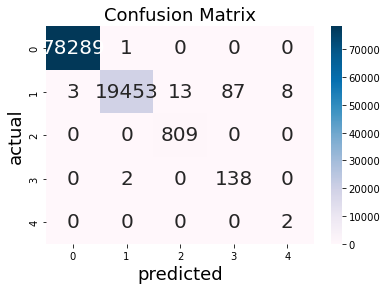

In [64]:
y_pred_forest = clf2.predict(df_test_without_pipeline)
evaluation(y_pred_forest, y_test) # with cross validation

In [50]:
df

,0,1,2,3,4,5,6,7,8,9,...,4,5,6,7,8,9,10,11,12,13
0,-0.160253,-0.673105,2.016972,-0.006559,-0.050036,-0.002755,-0.080299,-0.010061,-0.417048,-0.06711,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.160253,-0.724493,1.933194,-0.006559,-0.050036,-0.002755,-0.080299,-0.010061,-0.417048,-0.06711,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.160253,0.879776,-0.457382,-0.006559,-0.050036,-0.002755,-0.080299,-0.010061,-0.417048,-0.06711,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.160253,-1.514584,-0.457382,-0.006559,-0.050036,-0.002755,-0.080299,-0.010061,-0.417048,-0.06711,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.160253,0.879776,-0.457382,-0.006559,-0.050036,-0.002755,-0.080299,-0.010061,-0.417048,-0.06711,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395211,-0.160253,-0.062873,-0.457382,-0.006559,-0.050036,-0.002755,-0.080299,-0.010061,-0.417048,-0.06711,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
395212,-0.160253,-0.062873,-0.457382,-0.006559,-0.050036,-0.002755,-0.080299,-0.010061,-0.417048,-0.06711,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
395213,-0.160253,0.879776,-0.457382,-0.006559,-0.050036,-0.002755,-0.080299,-0.010061,-0.417048,-0.06711,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
395214,-0.160253,-1.514584,-0.457382,-0.006559,-0.050036,-0.002755,-0.080299,-0.010061,-0.417048,-0.06711,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_halving_search_cv # noqa
from sklearn.model_selection import HalvingGridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=30, stratify=y)
pipeline = get_classifier(numeric_cols, categorical_cols)

#TODO try HalvingGridSearchCV
grid = HalvingGridSearchCV(pipeline, param_grid=PARAM_GRID, cv=5)
grid.fit(X_train, y_train)

HalvingGridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                               ColumnTransformer(remainder='passthrough',
                                                                 transformers=[('cat',
                                                                                Pipeline(steps=[('ohc',
                                                                                                 OneHotEncoder(handle_unknown='ignore',
                                                                                                               sparse=False))]),
                                                                                ['flag',
                                                                                 'protocol_type']),
                                                                               ('num',
                                                                                Pipeline(steps=[('quant',
         

In [29]:
print("score = %3.2f" %(grid.score(X_test,y_test)))

score = 1.00


In [30]:
probas = grid.predict_proba(X_test)

In [31]:
prob = grid.predict(X_test)

In [32]:
grid.get_params

<bound method BaseEstimator.get_params of HalvingGridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                               ColumnTransformer(remainder='passthrough',
                                                                 transformers=[('cat',
                                                                                Pipeline(steps=[('ohc',
                                                                                                 OneHotEncoder(handle_unknown='ignore',
                                                                                                               sparse=False))]),
                                                                                ['flag',
                                                                                 'protocol_type']),
                                                                               ('num',
                                                                         

In [33]:
probas

array([[9.99742499e-01, 1.70187377e-07, 2.33934689e-04, 8.58535728e-06,
        1.48106933e-05],
       [9.99989302e-01, 7.67017709e-07, 2.77250756e-07, 9.70938202e-07,
        8.68250959e-06],
       [9.99989302e-01, 7.67017709e-07, 2.77250756e-07, 9.70938202e-07,
        8.68250959e-06],
       ...,
       [9.99989302e-01, 7.67017709e-07, 2.77250756e-07, 9.70938202e-07,
        8.68250959e-06],
       [9.99989302e-01, 7.67017709e-07, 2.77250756e-07, 9.70938202e-07,
        8.68250959e-06],
       [9.99989302e-01, 7.67017709e-07, 2.77250756e-07, 9.70938202e-07,
        8.68250959e-06]])

In [34]:
print(grid.best_params_)

{'clf': LogisticRegression(solver='liblinear'), 'clf__solver': 'liblinear'}


In [35]:
y.value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: attack_type, dtype: int64

In [53]:
# Modeling Evaluation
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support, cohen_kappa_score
import seaborn as sns
#TODO to fix evaluation function for multilabel classifications 
def evaluation(y_pred, y_test, title = 'Confusion Matrix'):
    cm = confusion_matrix(y_pred, y_test)
    # precision = precision_score(y, y_hat, average='micro')
    # recall = recall_score(y, y_hat, average='micro')
    # accuracy = accuracy_score(y,y_hat)
    # f1 = f1_score(y,y_hat,average='micro')
    
    print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))
    print(classification_report(y_test, y_pred, digits=3))
    print(f'cohen kappa score: {cohen_kappa_score(y_test, y_pred)}')
    # print('Recall: {:.2f}'.format(recall))
    # print('Accuracy: {:.2f}'.format(accuracy))
    # print('Precision: {:.2f}'.format(precision))
    # print('F1: {:.2f}'.format(f1))
    sns.heatmap(cm,  cmap= 'PuBu', annot=True, fmt='g', annot_kws={'size':20})
    plt.xlabel('predicted', fontsize=18)
    plt.ylabel('actual', fontsize=18)
    plt.title(title, fontsize=18)
    
    plt.show()

(0.9979002263355868, 0.9979555690501493, 0.9979006016466981, None)
              precision    recall  f1-score   support

         dos      1.000     1.000     1.000     78292
      normal      0.993     0.997     0.995     19456
       probe      0.975     0.895     0.933       822
         r2l      0.910     0.804     0.854       225
         u2r      0.600     0.300     0.400        10

    accuracy                          0.998     98805
   macro avg      0.895     0.799     0.836     98805
weighted avg      0.998     0.998     0.998     98805

cohen kappa score: 0.9938601785743768


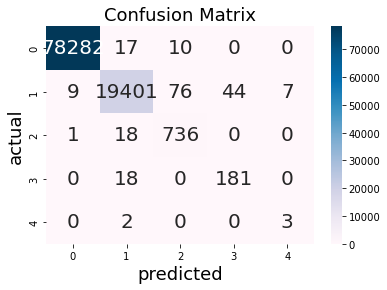

In [53]:
evaluation(prob, y_test) # with cross validation

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, QuantileTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
def get_classifier2(numeric_cols, categorical_cols):
    numeric_pipeline = Pipeline(steps=[
        ('quant',QuantileTransformer()),
        ('scaler',StandardScaler())
    ])
    categorical_pipeline = Pipeline(steps=[
        ('ohc', OneHotEncoder(sparse=False, handle_unknown='ignore'))
    ])
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', categorical_pipeline, categorical_cols),
            ('num', numeric_pipeline, numeric_cols)
        ],
        remainder='passthrough'
    )
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('clf', RandomForestClassifier(n_estimators=50,
                             max_depth=10,
                             random_state=2))        
    ])
    return pipeline

PARAM_GRID2 = [
    {
    'clf': [RandomForestClassifier()]
    }
    #   {} # to add another classifier
]

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_halving_search_cv # noqa
from sklearn.model_selection import HalvingGridSearchCV
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y,test_size=0.2, random_state=30, stratify=y)
pipeline2 = get_classifier(numeric_cols, categorical_cols)

#TODO try HalvingGridSearchCV
grid2 = HalvingGridSearchCV(pipeline2, param_grid=PARAM_GRID2, cv=5)
grid2.fit(X_train2, y_train2)

HalvingGridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                               ColumnTransformer(remainder='passthrough',
                                                                 transformers=[('cat',
                                                                                Pipeline(steps=[('ohc',
                                                                                                 OneHotEncoder(handle_unknown='ignore',
                                                                                                               sparse=False))]),
                                                                                ['flag',
                                                                                 'protocol_type']),
                                                                               ('num',
                                                                                Pipeline(steps=[('quant',
         

In [40]:
print("score = %3.2f" %(grid2.score(X_test2,y_test2)))

score = 1.00


In [41]:
probas2 = grid2.predict_proba(X_test2)

In [42]:
prob2 = grid2.predict(X_test2)

In [43]:
print (grid2.best_params_)

{'clf': RandomForestClassifier()}


(0.9997805759106249, 0.999787460148778, 0.9997792861229619, None)
              precision    recall  f1-score   support

         dos      1.000     1.000     1.000     78292
      normal      0.999     1.000     0.999     19456
       probe      1.000     0.994     0.997       822
         r2l      0.995     0.969     0.982       225
         u2r      0.833     0.500     0.625        10

    accuracy                          1.000     98805
   macro avg      0.966     0.893     0.921     98805
weighted avg      1.000     1.000     1.000     98805

cohen kappa score: 0.9993622039333294


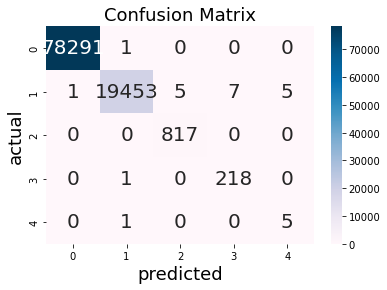

In [54]:
evaluation(prob2, y_test2) # with cross validation